In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
def loadRawData(filename, nrows):
    return pd.read_parquet(filename)[:nrows]


def selectColumns(dataframe, columns):
    newDataframe = dataframe.copy()
    return newDataframe[columns]

def convertTimes(dataframe, columns):
    for column in columns:
        dataframe[column] = (pd.to_timedelta(dataframe[column], errors='coerce') / np.timedelta64(1, 'm'))

def removeNullValues(dataframe):
    dataframe.dropna(axis=0, inplace=True)


data = loadRawData('recipes-sampled.parquet', 100)

keepColumns = ['Name',
               'CookTime', 'PrepTime', 'TotalTime', 
               'RecipeCategory', 
               'RecipeIngredientParts',
               'RecipeInstructions']
reducedData = selectColumns(data, keepColumns)

convertTimes(reducedData, columns=['CookTime', 'PrepTime', 'TotalTime'])


removeNullValues(reducedData)

In [3]:
reducedData.head()

,Name,CookTime,PrepTime,TotalTime,RecipeCategory,RecipeIngredientParts,RecipeInstructions
338716,Chicken a L 'orange,30.0,10.0,40.0,Lunch/Snacks,"[orange, water, unsalted butter, skinless chic...","[Mix frozen orange juice with water, set aside..."
425574,Healthy Three Grain Bread,35.0,120.0,155.0,Yeast Breads,"[warm water, honey, whole wheat flour, bread f...","[Preheat your oven to 400 degrees., Cook the o..."
411297,Prosciutto-Wrapped Chicken Breasts,15.0,10.0,25.0,Chicken Breast,"[boneless skinless chicken breasts, black pepp...",[Season the chicken with 1/2 teaspoon pepper a...
421354,Easy Pork Chile Verde,600.0,20.0,620.0,Meat,"[green chili salsa, diced green chilies, bonel...",[Turn on a 4-6 quart crock pot to high heat se...
456033,Root Beer Float Cupcakes,17.0,45.0,62.0,Dessert,"[butter, eggs, all-purpose flour, baking powde...",[Allow butter and eggs to stand at room temper...


In [4]:
reducedData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CookTime,82.0,107.463415,484.635620,2.0,15.00,27.5,45.00,4320.0
PrepTime,82.0,36.560976,157.862035,0.0,10.00,15.0,23.75,1440.0
TotalTime,82.0,144.024390,504.325879,10.0,31.25,45.0,71.50,4325.0


In [5]:
topNumberCategories = 10
topCategories = reducedData['RecipeCategory'].value_counts().index.to_list()[:topNumberCategories]

topCategoriesDataframe = reducedData[reducedData['RecipeCategory'].isin(topCategories)]

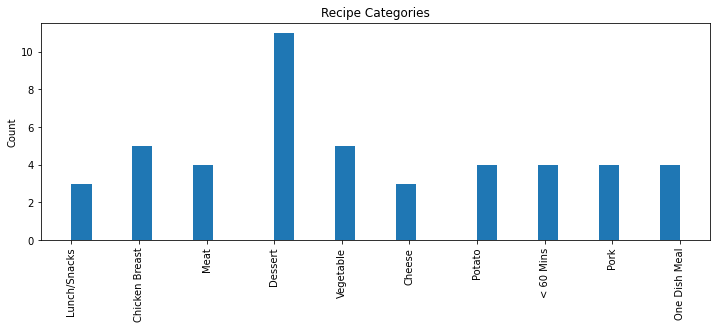

In [6]:
figCategories = plt.figure(figsize=(12, 4))
plt.hist(topCategoriesDataframe['RecipeCategory'], bins=30)
plt.title('Recipe Categories')
plt.ylabel('Count')
plt.xticks(rotation=90);

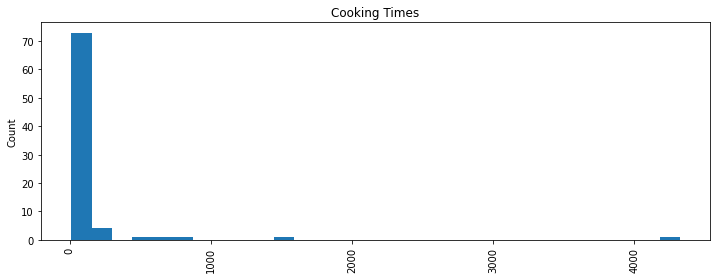

In [7]:
figTotalTime = plt.figure(figsize=(12, 4))
plt.hist(reducedData['TotalTime'], bins=30)
plt.title('Cooking Times')
plt.ylabel('Count')
plt.xticks(rotation=90);

In [8]:
totalTimeRange = (15, 100)

filteredData = reducedData[(reducedData['TotalTime'] >= totalTimeRange[0]) & (reducedData['TotalTime'] <= totalTimeRange[1])]
filteredData.head()

,Name,CookTime,PrepTime,TotalTime,RecipeCategory,RecipeIngredientParts,RecipeInstructions
338716,Chicken a L 'orange,30.0,10.0,40.0,Lunch/Snacks,"[orange, water, unsalted butter, skinless chic...","[Mix frozen orange juice with water, set aside..."
411297,Prosciutto-Wrapped Chicken Breasts,15.0,10.0,25.0,Chicken Breast,"[boneless skinless chicken breasts, black pepp...",[Season the chicken with 1/2 teaspoon pepper a...
456033,Root Beer Float Cupcakes,17.0,45.0,62.0,Dessert,"[butter, eggs, all-purpose flour, baking powde...",[Allow butter and eggs to stand at room temper...
327844,Sweet Plantain and Sausage Stuffing,35.0,30.0,65.0,Vegetable,"[plantain, onion, raisins, turkey broth, skim ...",[Place chunks of plantains onto greased baking...
519449,Basketball Queso,20.0,15.0,35.0,Cheese,"[unsalted butter, flour, salt, black pepper, c...",[Set a large saucepan over medium-high heat wi...


In [9]:
recipeCategories = filteredData['RecipeCategory'].unique().tolist()

In [10]:
selection = recipeCategories[:3]
print(selection)

filteredData[filteredData['RecipeCategory'].isin(selection)].head()

['Lunch/Snacks', 'Chicken Breast', 'Dessert']


,Name,CookTime,PrepTime,TotalTime,RecipeCategory,RecipeIngredientParts,RecipeInstructions
338716,Chicken a L 'orange,30.0,10.0,40.0,Lunch/Snacks,"[orange, water, unsalted butter, skinless chic...","[Mix frozen orange juice with water, set aside..."
411297,Prosciutto-Wrapped Chicken Breasts,15.0,10.0,25.0,Chicken Breast,"[boneless skinless chicken breasts, black pepp...",[Season the chicken with 1/2 teaspoon pepper a...
456033,Root Beer Float Cupcakes,17.0,45.0,62.0,Dessert,"[butter, eggs, all-purpose flour, baking powde...",[Allow butter and eggs to stand at room temper...
300812,Beer Can Chicken,60.0,15.0,75.0,Lunch/Snacks,"[brown sugar, salt, whole chickens, beer]",[Fire up your grill for medium indirect grilli...
511090,Banana Pudding,15.0,30.0,45.0,Dessert,"[sugar, all-purpose flour, salt, eggs, milk, v...","[Mix 1/2 cup sugar, flour and salt in top of d..."


In [11]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

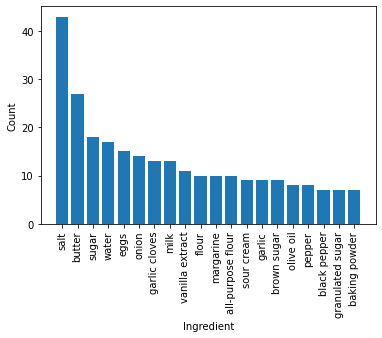

In [16]:
topNumberIngredients = 20

labels = to_1D(reducedData['RecipeIngredientParts']).value_counts().index[:topNumberIngredients]
values = to_1D(reducedData['RecipeIngredientParts']).value_counts().values[:topNumberIngredients]

plt.figure()
plt.bar(labels, values)
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.xlabel('Ingredient');